### Jupyter Notebook 단축키
- ctrl+enter: 셀 실행
- shift+enter: 셀 실행 및 다음 셀 이동
- alt+enter: 셀 실행, 다음 셀 이동, 새로운 셀 생성
- a: 상단에 새로운 셀 만들기
- b: 하단에 새로운 셀 만들기
- dd: 셀 삭제(x: 셀 삭제)
- esc: 셀 나가기
- m: 마크다운 셀로 바꾸기
- y: 마크다운 셀을 다시 Code로 바꾸기

# 04장_회귀

## 4.1 선형 회귀

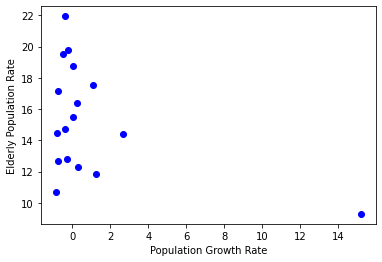

In [5]:
#시각화

import matplotlib.pyplot as plt
population_inc = [0.3, -0.78, 1.26, 0.03, 1.11, 15.17, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
population_old = [12.27, 14.44, 11.87, 18.75, 17.52, 9.29, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

plt.plot(population_inc, population_odd, 'bo')
plt.xlabel('Population Growth Rate')
plt.ylabel('Elderly Population Rate')
plt.show()

* 치우친 하나의 점은 outlier로 볼 수 있으며, 이는 일반적인 경향에서 벗어나는 사례임

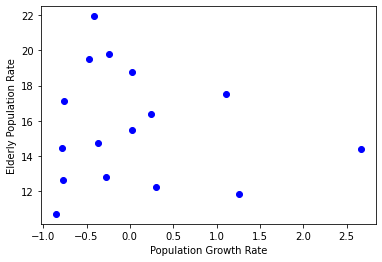

In [7]:
#시각화 
# Outlier 제거

import matplotlib.pyplot as plt
population_inc = [0.3, -0.78, 1.26, 0.03, 1.11, 15.17, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
population_inc = population_inc[:5] + population_inc[6:]
population_old = [12.27, 14.44, 11.87, 18.75, 17.52, 9.29, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]
population_old = population_old[:5] + population_old[6:]

plt.plot(population_inc, population_old, 'bo')
plt.xlabel('Population Growth Rate')
plt.ylabel('Elderly Population Rate')
plt.show()

a:  -0.355834147915461 b:  15.669317743971302


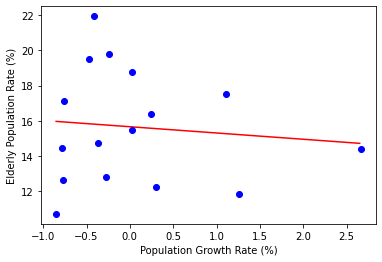

In [9]:
# 잔차의 제곱을 최소화 : 최소제곱법(Least Square Methed)
# 인구 증가율이 X, 고령인구비율이 Y

import numpy as np
import matplotlib.pyplot as plt

X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]

Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

# X, Y의 평균을 구함
x_bar = sum(X) / len(X)
y_bar = sum(Y) / len(Y)

# 최소제곱법으로 a, b를 구함
a = sum([(y - y_bar) * (x - x_bar) for y, x in list(zip(Y,X))])
a /= sum([(x - x_bar) ** 2 for x in X])
b = y_bar - a * x_bar
print('a: ', a, 'b: ', b)

# 그래프를 그리기 위해 회귀선의 x, y데이터를 구함
line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x + b

# 붉은색 실선으로 회귀선 그림
plt.plot(line_x, line_y, 'r-')

plt.plot(X, Y, 'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

99 a: 0.09748396 b: 7.1425037 loss: 82.3187
199 a: -0.13595057 b: 11.54316 loss: 26.766487
299 a: -0.2683337 b: 14.027171 loss: 12.471194
399 a: -0.32760292 b: 15.139488 loss: 10.060871
499 a: -0.34848613 b: 15.531417 loss: 9.799776
599 a: -0.35429916 b: 15.6405115 loss: 9.781631
699 a: -0.35557923 b: 15.664535 loss: 9.780827
799 a: -0.35580105 b: 15.668696 loss: 9.780805
899 a: -0.3558309 b: 15.669256 loss: 9.780803
999 a: -0.35583323 b: 15.669303 loss: 9.780804


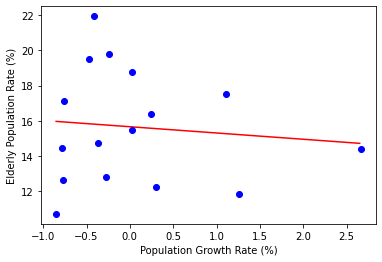

In [18]:
# 최소제곱법을 쓰지 않고 텐서플로 이용

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

# a와 b를 랜덤한 값으로 초기화
a = tf.Variable(random.random())
b = tf.Variable(random.random())

# 잔차의 제곱의 평균을 반환하는 함수
def compute_loss():
    y_pred = a * X + b
    loss = tf.reduce_mean((Y - y_pred) ** 2)
    return loss

optimizer = tf.optimizers.Adam(lr=0.07)
for i in range(1000):
    # 잔차의 제곱의 평균을 최소화(minimize)
    optimizer.minimize(compute_loss, var_list=[a,b])
    
    if i % 100 == 99:
        print(i, 'a:', a.numpy(), 'b:', b.numpy(), 'loss:', compute_loss().numpy())
        
line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x + b

# 그래프
plt.plot(line_x, line_y, 'r-')
plt.plot(X, Y, 'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

## 4.2 다항 회귀
* 비선형 회귀(nonlinear regression)는 선형 회귀로는 표현할 수 없는 데이터의 경향성을 설명하기 위한 회귀
* 이 중 다항식을 이용한 회귀를 다항 회귀(ploynomial regression)이라고 함

C:\Users\seunghwan\.conda\envs\nnew\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


99 a: 4.155202 b: -6.003824 c: 6.0490036 loss: 73.78907
199 a: 3.0135682 b: -4.86478 c: 9.912774 loss: 34.52137
299 a: 1.4520807 b: -2.5404432 c: 12.627656 loss: 17.35999
399 a: 0.43780243 b: -1.0227627 c: 14.371027 loss: 11.41351
499 a: -0.122781605 b: -0.18441531 c: 15.337006 loss: 9.836601
599 a: -0.39222276 b: 0.21848719 c: 15.801536 loss: 9.514048
699 a: -0.5052029 b: 0.38742694 c: 15.996334 loss: 9.462996
799 a: -0.5465963 b: 0.44932187 c: 16.067705 loss: 9.456745
899 a: -0.55983734 b: 0.46912196 c: 16.090536 loss: 9.456156
999 a: -0.5635211 b: 0.47463 c: 16.096888 loss: 9.456114


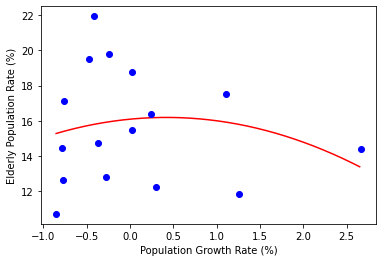

In [1]:
# 2차 함수를 이용한 다항 회귀
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

# a, b, c를 랜덤한 값으로 초기화
a = tf.Variable(random.random())
b = tf.Variable(random.random())
c = tf.Variable(random.random())

# 잔차의 제곱의 평균을 반환하는 함수
def compute_loss():
    y_pred = a * X*X + b * X + c
    loss = tf.reduce_mean((Y - y_pred) ** 2)
    return loss

optimizer = tf.optimizers.Adam(lr=0.07)
for i in range(1000):
    # 잔차의 제곱의 평균을 최소화(minimize)
    optimizer.minimize(compute_loss, var_list=[a,b,c])
    
    if i % 100 == 99:
        print(i, 'a:', a.numpy(), 'b:', b.numpy(), 'c:', c.numpy(), 'loss:', compute_loss().numpy())
        
line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x * line_x + b * line_x + c

# 그래프
plt.plot(line_x, line_y, 'r-')
plt.plot(X, Y, 'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

99 a: -1.0784384 b: 5.737078 c: -4.084313 d: 6.1866283 loss: 65.81014
199 a: -1.9705453 b: 6.8558817 c: -2.3868773 d: 9.787345 loss: 31.602383
299 a: -1.7258471 b: 5.312931 c: -0.9863753 d: 11.972171 loss: 20.651424
399 a: -1.0151881 b: 3.0511804 c: -0.5849716 d: 13.484183 loss: 14.6869545
499 a: -0.30784357 b: 0.9748982 c: -0.48017484 d: 14.623711 loss: 11.227787
599 a: 0.25777596 b: -0.6610319 c: -0.43693015 d: 15.48265 loss: 9.413686
699 a: 0.6699879 b: -1.8501633 c: -0.41047284 d: 16.101633 loss: 8.562029
799 a: 0.9514647 b: -2.6617327 c: -0.39307225 d: 16.523266 loss: 8.203497
899 a: 1.1325814 b: -3.1838627 c: -0.38199022 d: 16.794373 loss: 8.068088
999 a: 1.2425269 b: -3.5008035 c: -0.37528604 d: 16.958906 loss: 8.022244


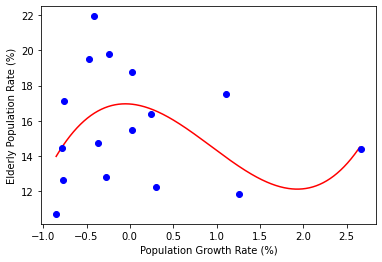

In [24]:
# 2차 함수를 이용한 다항 회귀
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

# a, b, c를 랜덤한 값으로 초기화
a = tf.Variable(random.random())
b = tf.Variable(random.random())
c = tf.Variable(random.random())
d = tf.Variable(random.random())

# 잔차의 제곱의 평균을 반환하는 함수
def compute_loss():
    y_pred = a * X*X*X + b * X*X + c * X + d
    loss = tf.reduce_mean((Y - y_pred) ** 2)
    return loss

optimizer = tf.optimizers.Adam(lr=0.07)
for i in range(1000):
    # 잔차의 제곱의 평균을 최소화(minimize)
    optimizer.minimize(compute_loss, var_list=[a,b,c,d])
    
    if i % 100 == 99:
        print(i, 'a:', a.numpy(), 'b:', b.numpy(), 'c:', c.numpy(), 'd:', d.numpy(), 'loss:', compute_loss().numpy())
        
line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x * line_x * line_x + b * line_x * line_x + c * line_x + d

# 그래프
plt.plot(line_x, line_y, 'r-')
plt.plot(X, Y, 'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

* 경향성을 잘 설명한다고 보기 어려움
* 다항 회귀에서 더 나아가 비선형 회귀를 적합해보는 것도 좋을듯 

## 4.3 딥러닝 네트워크를 이용한 회귀

In [25]:
import tensorflow as tf
import numpy as np

X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=6, activation='tanh', input_shape=(1,)),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1), loss='mse')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.fit(X, Y, epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 0s/step - loss: 255.4481
Epoch 2/10
1/1 [==============================] - 0s 998us/step - loss: 81.0185
Epoch 3/10
1/1 [==============================] - 0s 997us/step - loss: 16.5484
Epoch 4/10
1/1 [==============================] - 0s 998us/step - loss: 10.6525
Epoch 5/10
1/1 [==============================] - 0s 0s/step - loss: 9.8965
Epoch 6/10
1/1 [==============================] - 0s 0s/step - loss: 9.7968
Epoch 7/10
1/1 [==============================] - 0s 998us/step - loss: 9.7700
Epoch 8/10
1/1 [==============================] - 0s 997us/step - loss: 9.7507
Epoch 9/10
1/1 [==============================] - 0s 2ms/step - loss: 9.7316
Epoch 10/10
1/1 [==============================] - 0s 997us/step - loss: 9.7127


In [28]:
# 학습 에측값 확인
model.predict(X)

array([[15.756395 ],
       [15.6699295],
       [15.626331 ],
       [15.755697 ],
       [15.663265 ],
       [15.757463 ],
       [15.741125 ],
       [15.717802 ],
       [15.671778 ],
       [15.729189 ],
       [15.656397 ],
       [15.724867 ],
       [15.738657 ],
       [15.755402 ],
       [15.673605 ],
       [14.718418 ]], dtype=float32)

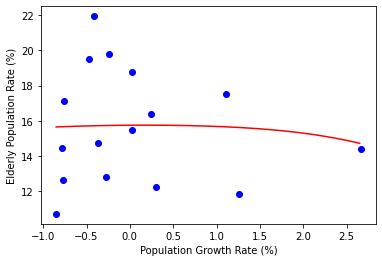

In [31]:
# 학습에 대한 시각화 결과
import matplotlib.pyplot as plt

line_x = np.arange(min(X), max(X), 0.01)
line_y = model.predict(line_x)

plt.plot(line_x, line_y, 'r-')
plt.plot(X, Y, 'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

## 4.4 보스턴 주택 가격 데이터세트

In [32]:
from tensorflow.keras.datasets import boston_housing
(train_X, train_Y), (test_X, test_Y) = boston_housing.load_data()

print(len(train_X), len(test_X))
print(train_X[0])
print(train_Y[0])

57344/57026 [==============================] - 0s 0us/step
404 102
[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
15.2


In [35]:
x_mean = train_X.mean(axis=0)
x_std = train_X.std(axis=0)
train_X -= x_mean
train_X /= x_std
test_X -= x_mean
test_X /= x_std

y_mean = train_Y.mean(axis=0)
y_std = train_Y.std(axis=0)
train_Y -= y_mean
train_Y /= y_std
test_Y -= y_mean
test_Y /= y_std

print(train_X[0])
print(train_Y[0])

[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]
-0.782152603377916


In [62]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(units=39, activation='relu'),
    tf.keras.layers.Dense(units=26, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01), loss='mse')

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 52)                728       
_________________________________________________________________
dense_23 (Dense)             (None, 39)                2067      
_________________________________________________________________
dense_24 (Dense)             (None, 26)                1040      
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 27        
Total params: 3,862
Trainable params: 3,862
Non-trainable params: 0
_________________________________________________________________


* 레이어 수와 은닉층의 뉴런 수를 늘리면 모델의 표현력이 좋아짐

In [63]:
history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25) # trainig data의 25%를 검증으로 사용

Epoch 1/25
10/10 [==============================] - 0s 8ms/step - loss: 0.4458 - val_loss: 0.3396
Epoch 2/25
10/10 [==============================] - 0s 1ms/step - loss: 0.1730 - val_loss: 0.1985
Epoch 3/25
10/10 [==============================] - 0s 1ms/step - loss: 0.1320 - val_loss: 0.1651
Epoch 4/25
10/10 [==============================] - 0s 1ms/step - loss: 0.1139 - val_loss: 0.1691
Epoch 5/25
10/10 [==============================] - 0s 1ms/step - loss: 0.1236 - val_loss: 0.1608
Epoch 6/25
10/10 [==============================] - 0s 1ms/step - loss: 0.0895 - val_loss: 0.1802
Epoch 7/25
10/10 [==============================] - 0s 1ms/step - loss: 0.0725 - val_loss: 0.1847
Epoch 8/25
10/10 [==============================] - 0s 1ms/step - loss: 0.0635 - val_loss: 0.1734
Epoch 9/25
10/10 [==============================] - 0s 1ms/step - loss: 0.0650 - val_loss: 0.1663
Epoch 10/25
10/10 [==============================] - 0s 1ms/step - loss: 0.0556 - val_loss: 0.1610
Epoch 11/25
10/10 [

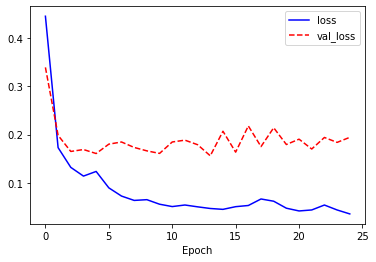

In [64]:
# loss는 꾸준히 감소하지만, val_loss는 loss보다 높은 값을 유지하며 항상 감소하지는 않음

import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [65]:
model.evaluate(test_X, test_Y) # 좋지 않은 결과

4/4 [==============================] - 0s 499us/step - loss: 2.8348


2.834782361984253

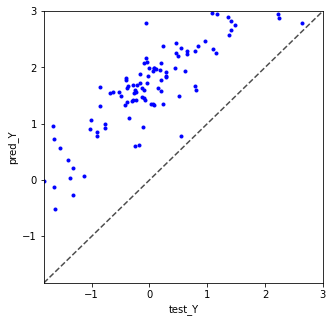

In [66]:
# 실제 주택 가격과 예측가격을 1:1로 비교

import matplotlib.pyplot as plt

pred_Y = model.predict(test_X)

plt.figure(figsize=(5,5))
plt.plot(test_Y, pred_Y, 'b.')
plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)])

# y=x에 해당하는 대각선
plt.plot([min(test_Y), max(test_Y)], [min(test_Y), max(test_Y)], ls="--", c=".3")
plt.xlabel('test_Y')
plt.ylabel('pred_Y')

plt.show()

In [72]:
# 과적합 되지 않도록!
# 콜백(callback) 함수 이용
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(units=39, activation='relu'),
    tf.keras.layers.Dense(units=26, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='mse')

history = model.fit(train_X, train_Y, epochs=100, batch_size=32, validation_split=0.25) # trainig data의 25%를 검증으로 사용
callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss')]

# patience는 몇 번의 에포크를 기준으로 삼을지?
# monitor는 어떤 값을 지켜볼 것인지

Epoch 1/100
10/10 [==============================] - 0s 8ms/step - loss: 3.2290 - val_loss: 0.9028
Epoch 2/100
10/10 [==============================] - 0s 1ms/step - loss: 0.5064 - val_loss: 0.6155
Epoch 3/100
10/10 [==============================] - 0s 1ms/step - loss: 0.4035 - val_loss: 0.3259
Epoch 4/100
10/10 [==============================] - 0s 1ms/step - loss: 0.3076 - val_loss: 0.2742
Epoch 5/100
10/10 [==============================] - 0s 1ms/step - loss: 0.2340 - val_loss: 0.2040
Epoch 6/100
10/10 [==============================] - 0s 1ms/step - loss: 0.1700 - val_loss: 0.1831
Epoch 7/100
10/10 [==============================] - 0s 1ms/step - loss: 0.1411 - val_loss: 0.1759
Epoch 8/100
10/10 [==============================] - 0s 1ms/step - loss: 0.1366 - val_loss: 0.2385
Epoch 9/100
10/10 [==============================] - 0s 1ms/step - loss: 0.1399 - val_loss: 0.2023
Epoch 10/100
10/10 [==============================] - 0s 1ms/step - loss: 0.1215 - val_loss: 0.1709
Epoch 11/

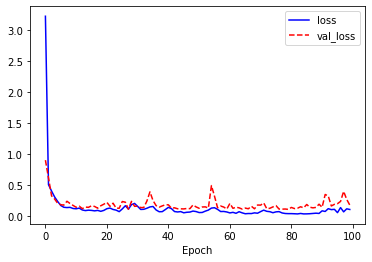

In [73]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [74]:
model.evaluate(test_X, test_Y)

4/4 [==============================] - 0s 499us/step - loss: 0.6928


0.6928421258926392

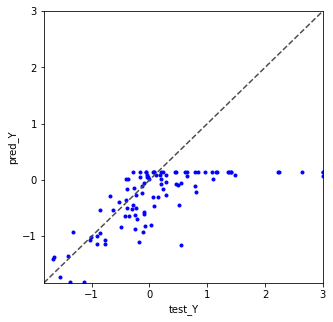

In [75]:
# 실제 주택 가격과 예측가격을 1:1로 비교

import matplotlib.pyplot as plt

pred_Y = model.predict(test_X)

plt.figure(figsize=(5,5))
plt.plot(test_Y, pred_Y, 'b.')
plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)])

# y=x에 해당하는 대각선
plt.plot([min(test_Y), max(test_Y)], [min(test_Y), max(test_Y)], ls="--", c=".3")
plt.xlabel('test_Y')
plt.ylabel('pred_Y')

plt.show()

## EOD